# AISC2000-Exercise 2
# Shyam prasath(500210637)

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
data=pd.read_csv("CardioGoodFitness.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
cardio=data.copy()

### View the first and last 5 rows of the dataset.

In [4]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Understand the shape of the dataset.

In [5]:
cardio.shape

(180, 9)

### Check the data types of the columns for the dataset.

In [6]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Fixing the data types
* All variables are Integer are valid data type except for fitness, it is a rating given by a customer for self-fitness on a scale of 5, it should be treated as a category.


* Product,Gender and Marital Status are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

* Product,Gender, Marital Status and Fitness have been converted to categories

`we can see that the memory usage has decreased from 12.8KB to 8.3KB`

In [7]:
for i in ["Product","Gender", "MaritalStatus", "Fitness"]:
    cardio[i]=cardio[i].astype('category')

In [8]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


### Give a statistical summary for the dataset.

* Mean of Age is greater than the median, this suggests that Age is right skewed.
* Education,Usage,Fitness has approximately same mean and median.
* Mean is greater than the median for Income and Miles variable which suggests that these variables are right skewed.

In [9]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [10]:
# Seperate the numerial and categorical column

data_cat = cardio.select_dtypes(include = 'category')
data_num = cardio.select_dtypes(exclude = 'category')

In [11]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Age,180.0,0.0,5182.0,28.788889,26.0,6.943498,4.821217e+01,18.0,19.00,20.00,22.0,24.00,26.0,33.00,38.1,43.05,48.00,50.0
Education,180.0,0.0,2803.0,15.572222,16.0,1.617055,2.614867e+00,12.0,12.00,14.00,14.0,14.00,16.0,16.00,18.0,18.00,21.00,21.0
Usage,180.0,0.0,622.0,3.455556,3.0,1.084797,1.176785e+00,2.0,2.00,2.00,2.0,3.00,3.0,4.00,5.0,5.05,6.21,7.0
Income,180.0,0.0,9669524.0,53719.577778,50596.5,16506.684226,2.724706e+08,29562.0,31597.23,34053.15,35247.0,44058.75,50596.5,58668.00,83416.0,90948.25,103597.45,104581.0
Miles,180.0,0.0,18575.0,103.194444,94.0,51.863605,2.689833e+03,21.0,38.00,47.00,53.0,66.00,94.0,114.75,180.0,200.00,284.20,360.0


* Product has three types of treadmill models, TM195 being the most sold model.
* Males(104) have purchased most products as compared to females(76).
* Married customers(107) have purchased most products as compared to singles(73)
* Most customers(97) rate them as 3 on a scale of 1 to 5 in Fitness levels.

In [12]:
for i in cardio.columns:
    print('Column name : ',i)
    print(cardio[i].value_counts())
    print("*"*50)

Column name :  Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
**************************************************
Column name :  Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
**************************************************
Column name :  Gender
Male      104
Female     76
Name: Gender, dtype: int64
**************************************************
Column name :  Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
**************************************************
Column name :  MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
**************************************************
Column name :  Usage
3    

### Check for missing values

In [13]:
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no missing values in the data.

### EDA

### Univariate analysis

column name Age


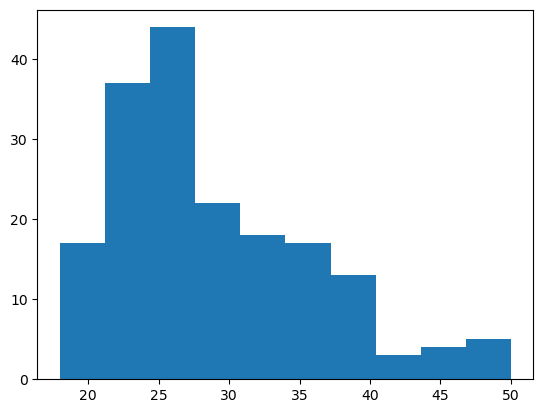

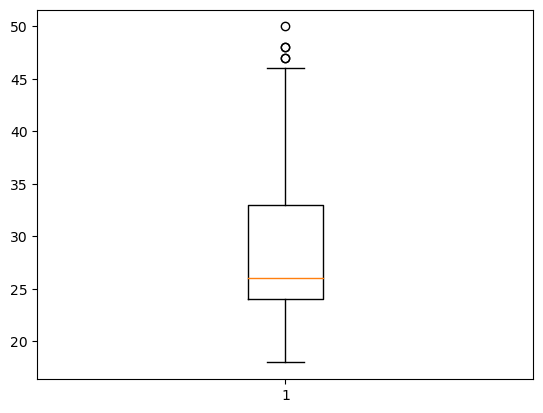

----------------------------------------------------------------------------------------------------
column name Education


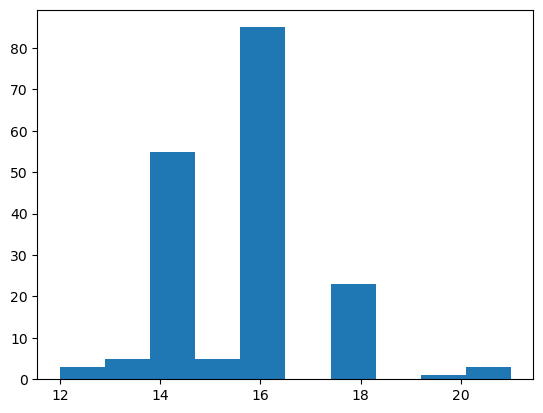

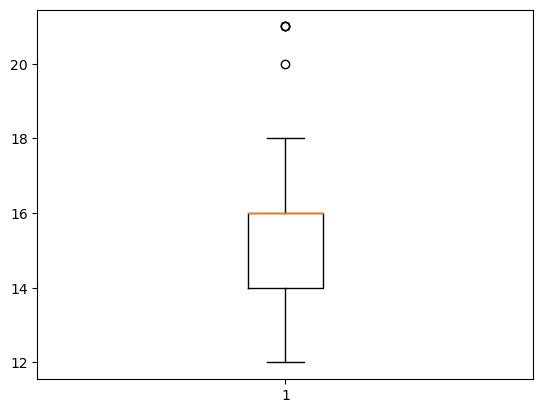

----------------------------------------------------------------------------------------------------
column name Usage


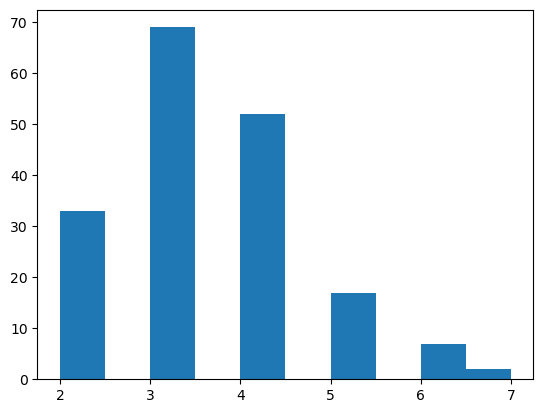

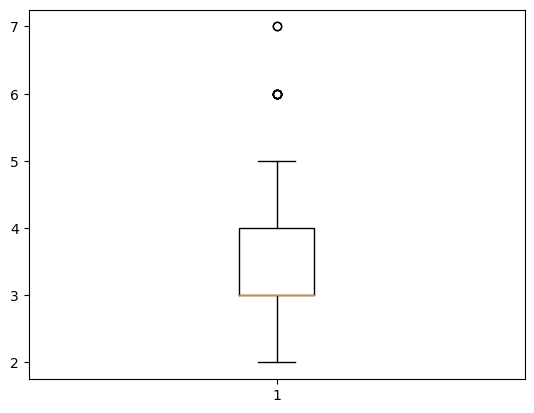

----------------------------------------------------------------------------------------------------
column name Income


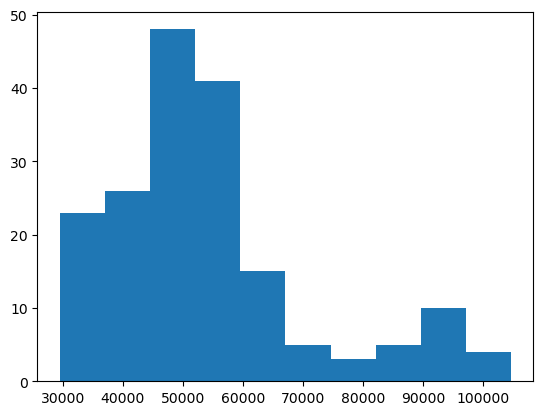

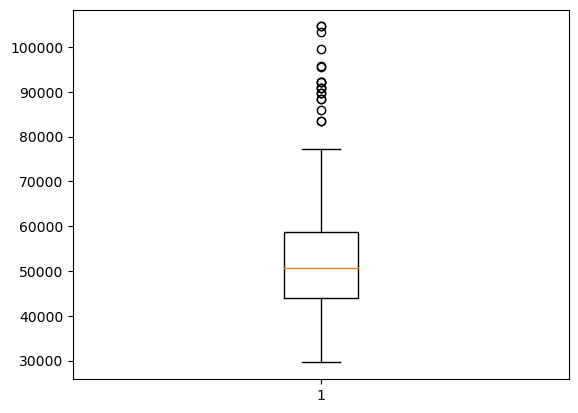

----------------------------------------------------------------------------------------------------
column name Miles


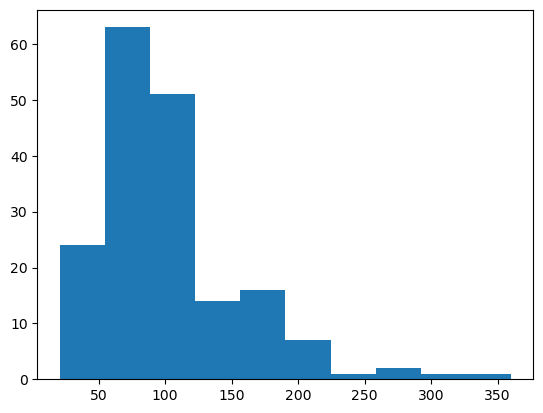

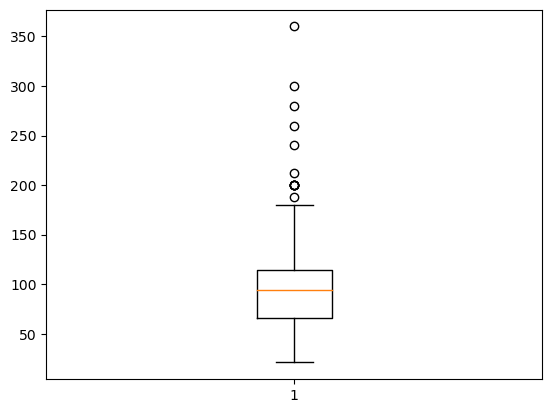

----------------------------------------------------------------------------------------------------


In [19]:

for i in data_num.columns:
    print("column name",i)
    plt.hist(data_num[i])
    plt.show()
    plt.boxplot(data_num[i])
    plt.show()
    print('--'*50)

>The distribution of Age is right skewed.

>From boxplot we can see that the third quartile(Q3) is equal to 33 which means 75% of customers are below the age of 33.

>Mean education for customers is 15.5 years

>There are a few outliers present in data (customers who have education of more than 18 years)

>Customers want to use the treadmills 3-4 times a week on an average.

>There are few outliers, customers who wish to use treadmills 6-7 times a week.

column name Product


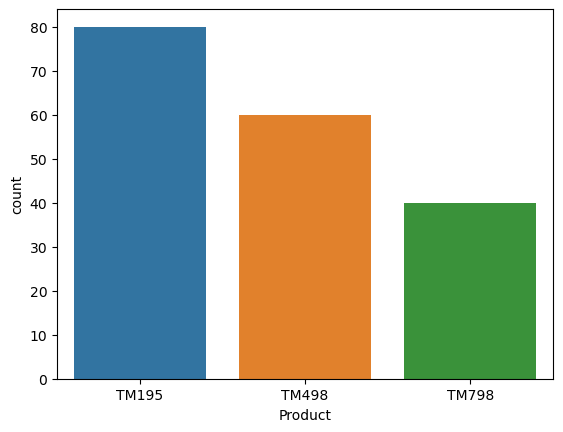

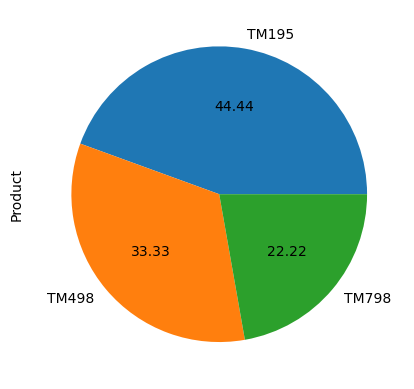

----------------------------------------------------------------------------------------------------
column name Gender


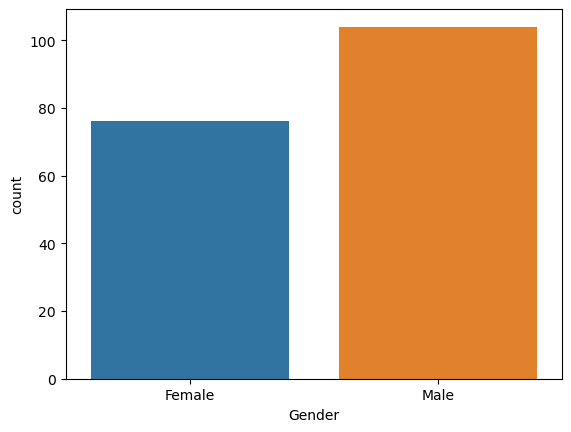

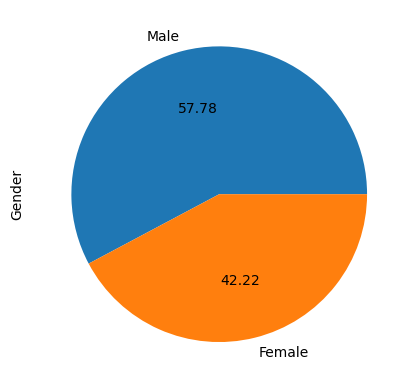

----------------------------------------------------------------------------------------------------
column name MaritalStatus


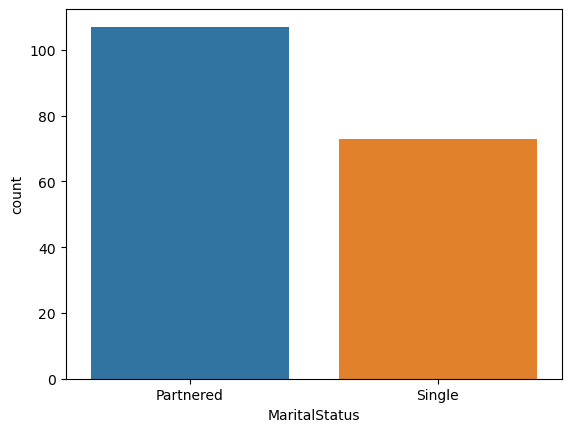

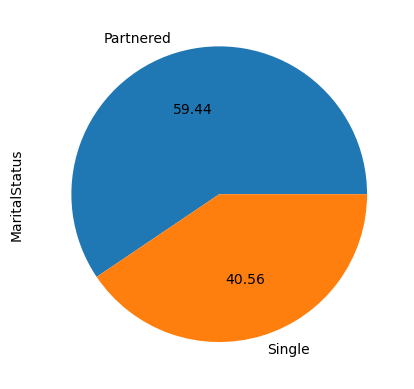

----------------------------------------------------------------------------------------------------
column name Fitness


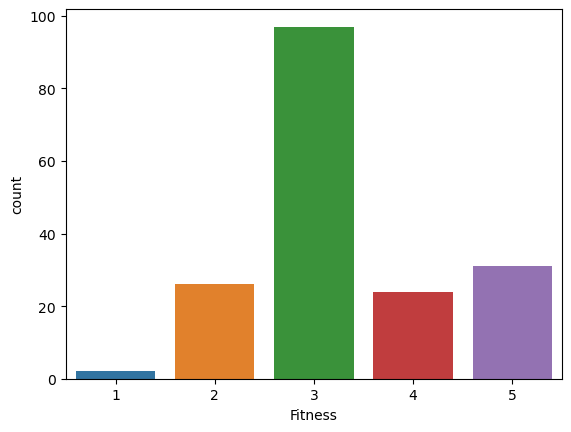

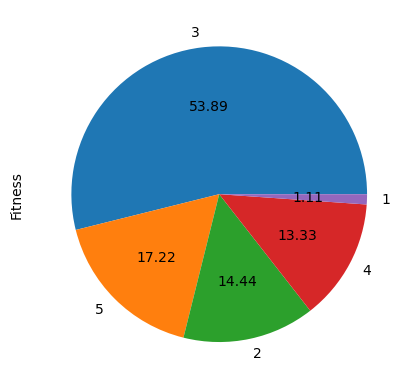

----------------------------------------------------------------------------------------------------


In [21]:
for i in data_cat.columns:
    print("column name",i)
    sns.countplot(data_cat[i])
    plt.show()
    data_cat[i].value_counts().plot(kind='pie',autopct='%.2f')
    plt.show()
    print('--'*50)

> There are more males customers(57.8%) than females(42.2%)

>40.6% of customers are single while 59.4% of customers have a partner.

>53.9% of the customers have rated them at 3 on a scale of 5 (1 being the least fit and 5 being the most fit),followed by 5 rating (17.2%).

>38.3% of customers wish to use the product 3 times a week followed by 28.9% customers who wish to use the product 4 times a week.

# Bivariate Analysis

column name Age


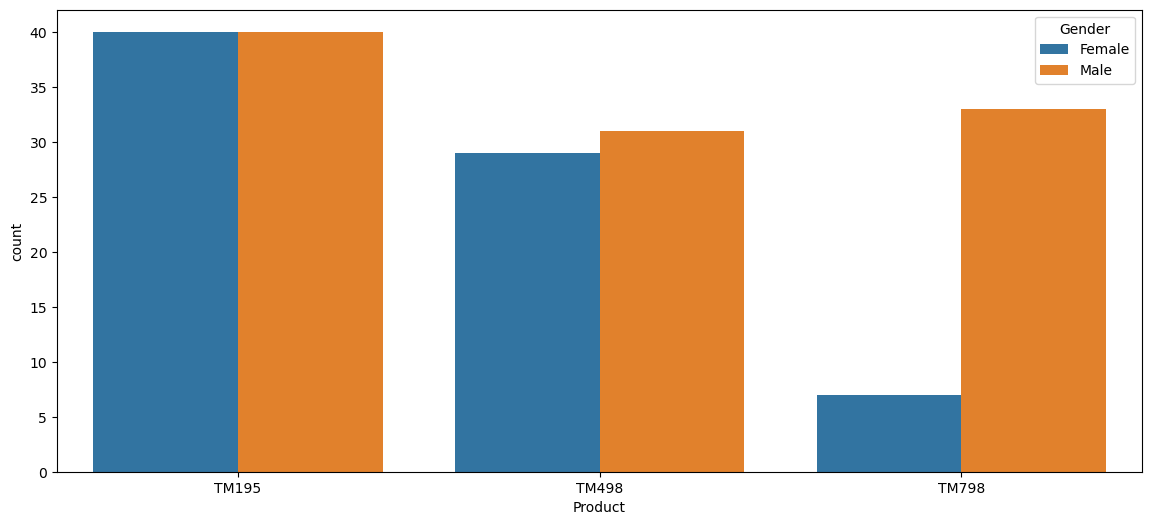

----------------------------------------------------------------------------------------------------
column name Education


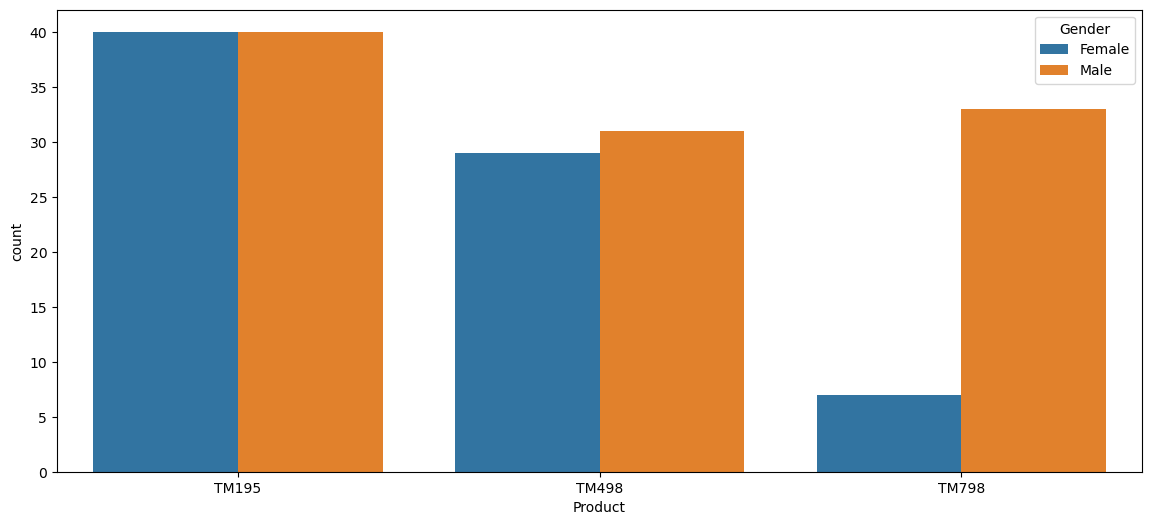

----------------------------------------------------------------------------------------------------
column name Fitness


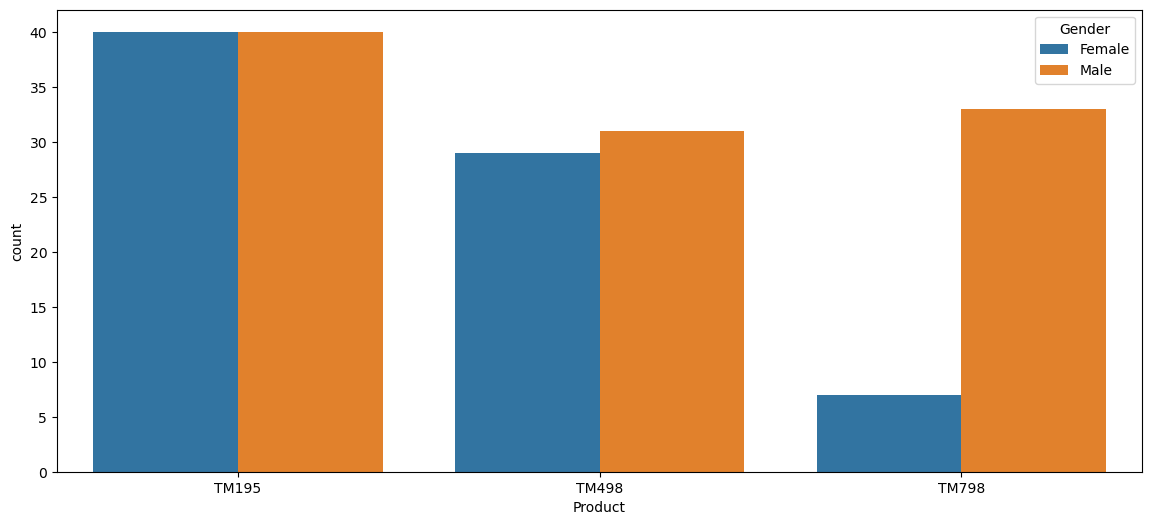

----------------------------------------------------------------------------------------------------
column name Gender


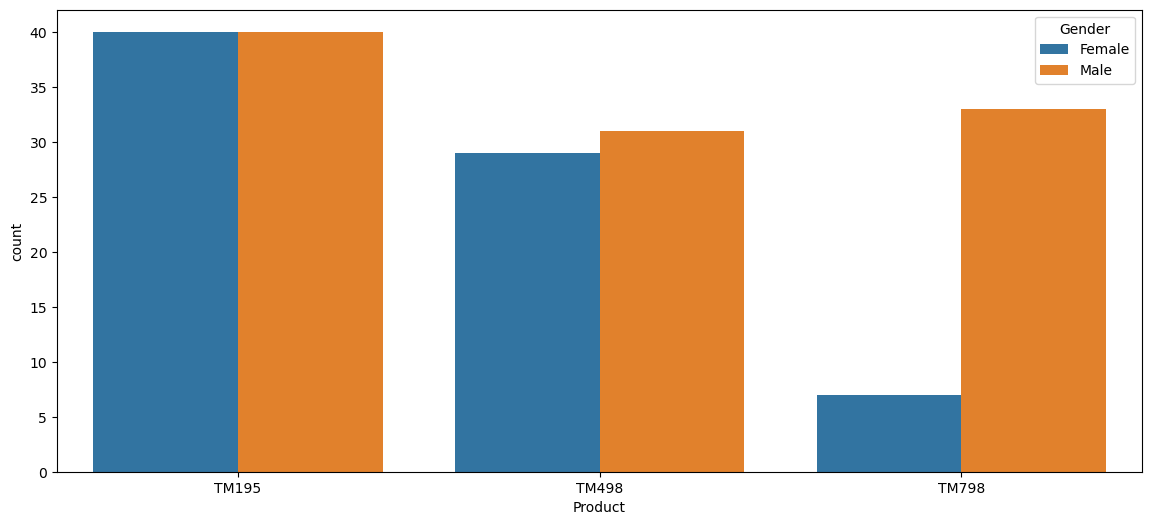

----------------------------------------------------------------------------------------------------
column name Income


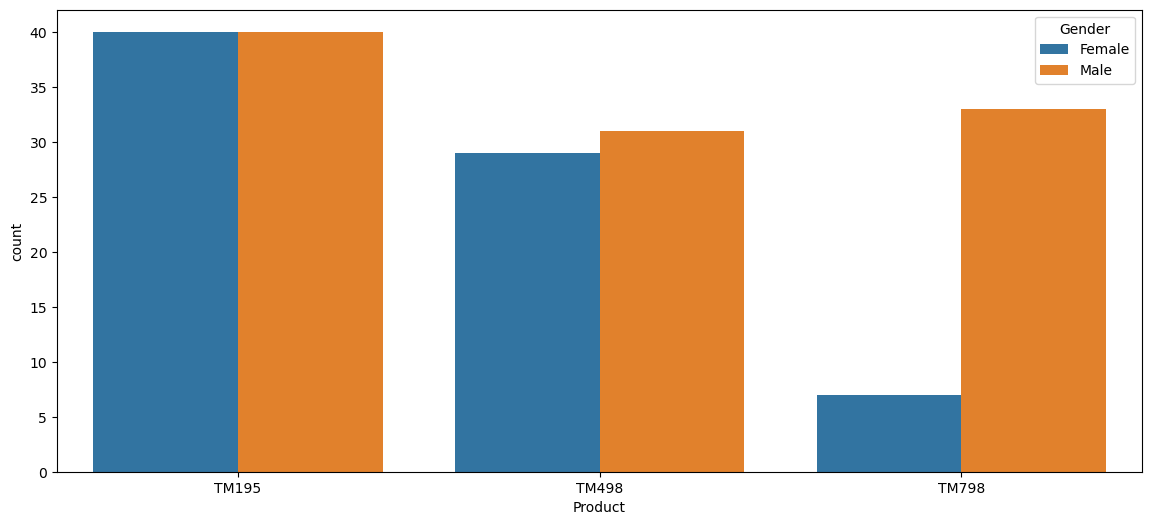

----------------------------------------------------------------------------------------------------
column name MaritalStatus


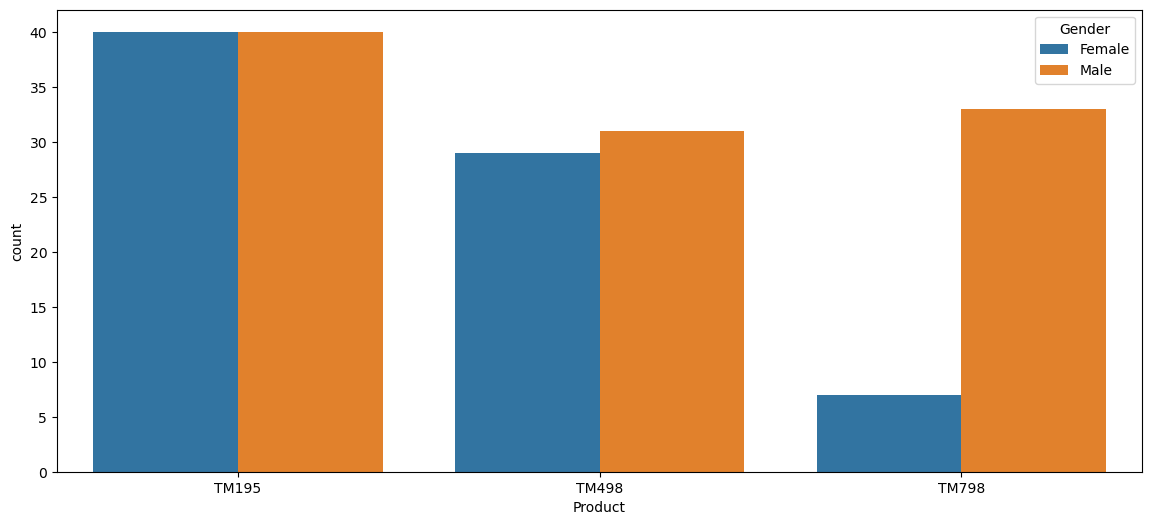

----------------------------------------------------------------------------------------------------
column name Miles


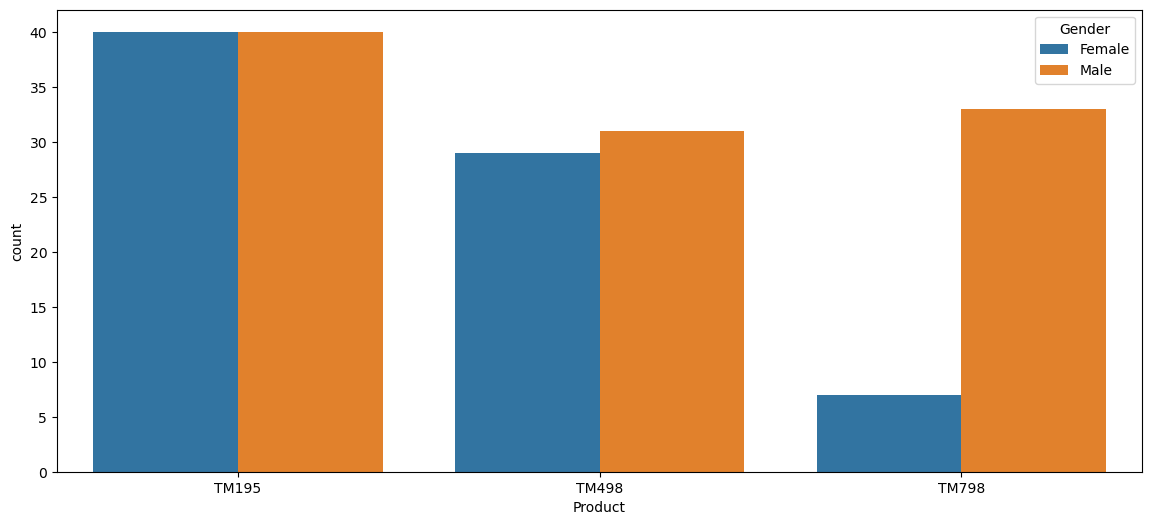

----------------------------------------------------------------------------------------------------
column name Usage


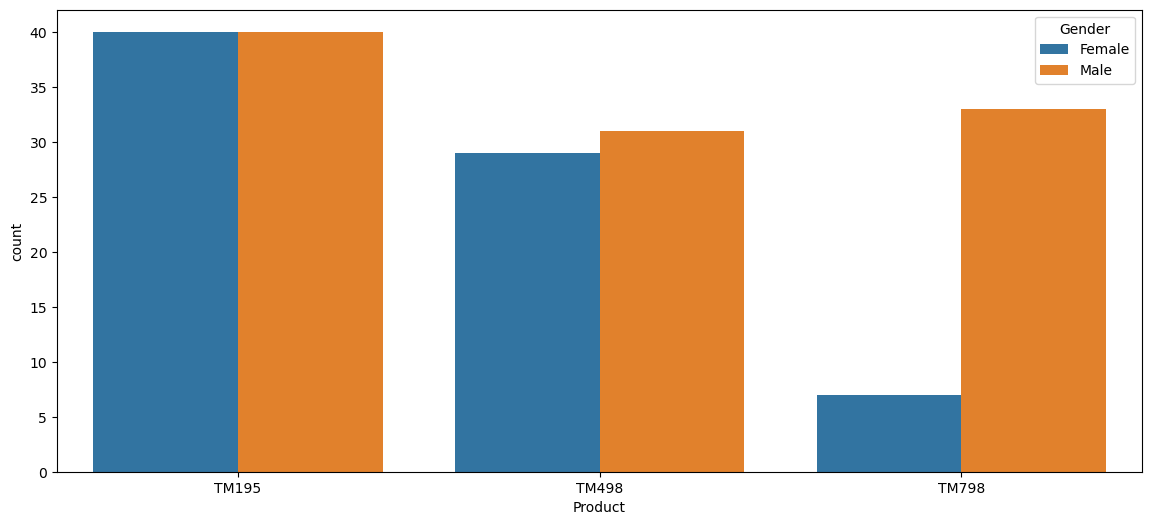

----------------------------------------------------------------------------------------------------


In [23]:
for i in cardio.columns.difference(['Product']):
    print("column name",i)
    plt.figure(figsize=(14, 6))
    sns.countplot(x='Product', data=cardio, hue='Gender')
    plt.show()
    print('--'*50)




> TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers)

> Customers buying TM798 have higher education as compared to the customers buying the other two other products

>Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

>Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

>Customers who expect to run higher miles go for TM798.

>TM798 has been bought more by the male customers as compared to the female customers, for TM195 and TM498 there is equal distribution among genders

>All the products are couple/partner friendly.

>Couples/partnered customers have a higher chance of buying a product when compared to single customers.

>Customers who purchased TM195 and TM498 gave themselves a balanced fitness rating of 3 (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

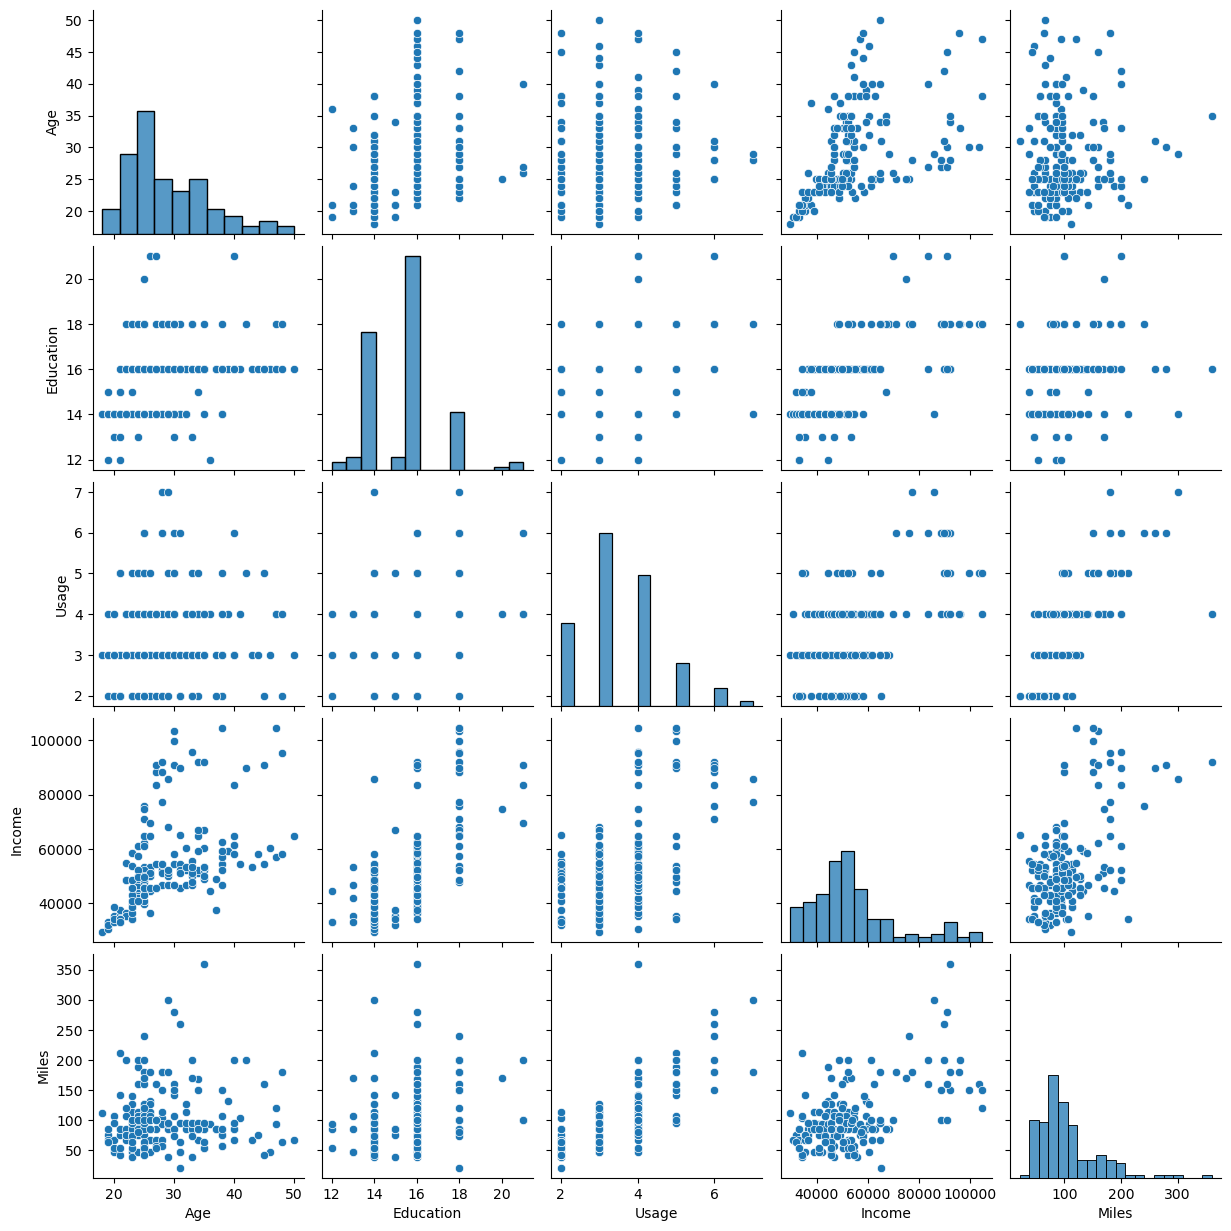

In [25]:
sns.pairplot(cardio)
plt.show()

# Observations

>Correlation are high for usage,miles and fitness

>education and income has strong correlation

>There are more male customers than female

>most of the products are brought by couples

>The top selling product is TM195

>TM498 are mostly used 3 to 4 times weekly

>Most of the customer are between the age 20 to 35

>The average income is between 45k to 55k

>TM798 are only brought by age group from 20 to 35

>TM798 males are more compared to females.